In [1]:
import h5py
import sys
from scipy import constants as sp

sys.path.append('..')

from system import *
from fields import *

Load IGRF coefficients ...


In [2]:
def get_size():
    f = h5py.File('test.hdf5', 'r')
    print((np.shape(f['history'][:, :, :, :])))
    f.close()
    
    return

In [3]:
e_field = zero_field()
b_field = t89(7)
s = System(e_field, b_field)

In [4]:
s.populate(3,
           delta(np.array([-10 * Re, 0, 0])),
           delta(1e6),
           uniform(np.radians(20), np.radians(60)),
           uniform(0, 2 * np.pi),
           delta(sp.m_e),
           delta(-sp.e))

100%|██████████| 3/3 [00:06<00:00,  2.10s/it]


In [5]:
s.solve(0.1, 1e-4, 1e-4)

100%|██████████| 3/3 [00:02<00:00,  1.27it/s]


In [6]:
def write_to_file(syst):
    hist = syst.history
    
    f = h5py.File('test.hdf5', 'a')
    if 'history' not in f.keys():
        f.create_dataset('history', np.shape(hist), maxshape=(None, None, None, None), dtype='float', compression='gzip')
    else:
        del f['history']
        f.create_dataset('history', np.shape(hist), maxshape=(None, None, None, None), dtype='float', compression='gzip')

    dset = f['history']
    dset[:] = np.copy(hist)
    
    dset.attrs['dt'] = s.dt
    dset.attrs['sample_dt'] = s.dt * s.downsample
    dset.attrs['r_dist'] = delta(np.array([-10 * Re, 0, 0]))
        
    f.close()
    
write_to_file(s)

TypeError: Object dtype dtype('O') has no native HDF5 equivalent

In [7]:
def append_particles_to_file(syst):
    hist = syst.history
    
    f = h5py.File('test.hdf5', 'r+') 
    
    dset = f['history']
    dset.resize((dset.shape[0] + np.shape(hist)[0], dset.shape[1], dset.shape[2], dset.shape[3]))
    dset[dset.shape[0]:-1] = np.copy(hist)

    f.close()

In [8]:
def append_time_to_file(syst):
    hist = syst.history
    
    f = h5py.File('test.hdf5', 'r+')    
    
    dset = f['history']
    dset.resize((dset.shape[0], dset.shape[1] + np.shape(hist)[1], dset.shape[2], dset.shape[3]))
    dset[:, dset.shape[1]:-1] = np.copy(hist[:, 1:, :, :])

    f.close()

In [16]:
def extend_time(T):
    f = h5py.File('test.hdf5', 'r+')
    
    dset = f['history']
    new_conditions = dset[:, -1, :, :]
    s.history[:, 0, :, :] = np.copy(new_conditions)
    s.solve(T, float(dset.attrs['dt']), float(dset.attrs['sample_dt']))
    
    append_time_to_file(s)
    
    f.close()

In [ ]:
def extend_particles(T):
    f = h5py.File('test.hdf5', 'r+')
    
    dset = f['history']
    new_conditions = dset[:, :, :, :]
    s.history[:, 0, :, :] = np.copy(new_conditions)
    s.solve(T, float(dset.attrs['dt']), float(dset.attrs['sample_dt']))
    
    append_time_to_file(s)
    
    f.close()

In [20]:
r = s.history[:, :, 0, :]

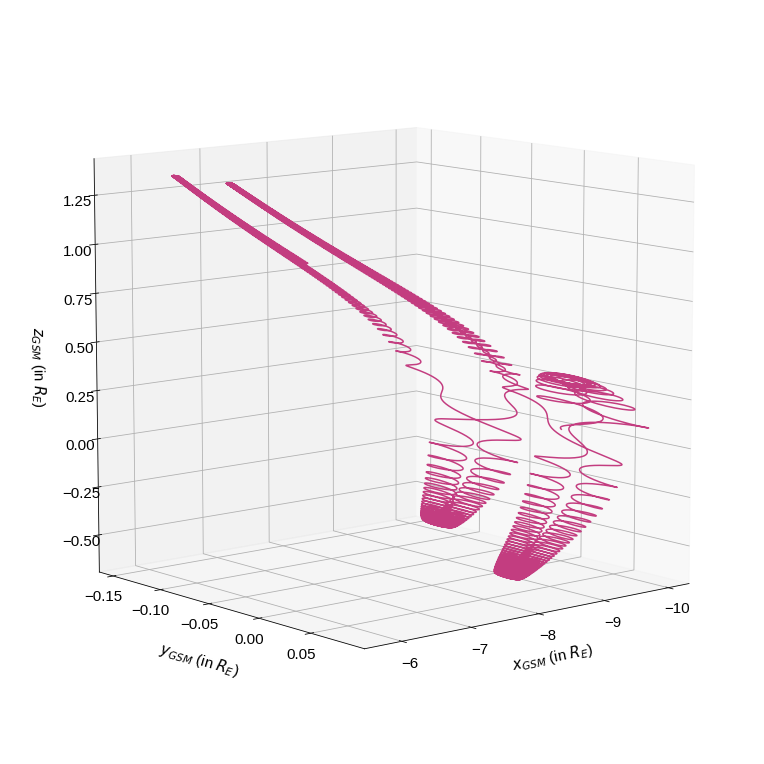

In [24]:
v = s.history[:, :, 1, :]

from mpl_toolkits.mplot3d import Axes3D

plt.rcParams.update({'font.size': 15})
plt.rcParams['font.family'] = 'Liberation Sans'

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

col = plt.cm.plasma(np.linspace(0, 0.7, 4))

for p, i in enumerate([2]):
    pos = s.history[i, :, 0]
    ax.plot(pos[:, 0] / Re, pos[:, 1] / Re, pos[:, 2] / Re, color=col[i])

ax.set_xlabel('\n$x_{GSM}$ (in $R_E$)', linespacing=1.5)
ax.set_ylabel('\n$y_{GSM}$ (in $R_E$)', linespacing=3)
ax.set_zlabel('\n$z_{GSM}$ (in $R_E$)', linespacing=3)

ax.view_init(10, 50)

plt.grid()
plt.tight_layout(pad=-1)
plt.show()

In [22]:
extend_time(1)

100%|██████████| 3/3 [00:02<00:00,  1.25it/s]


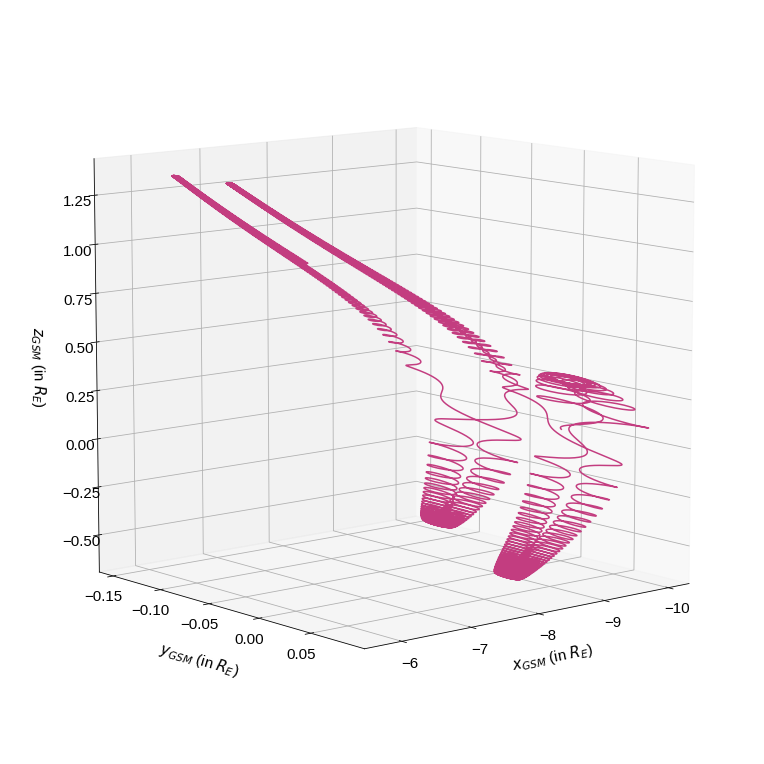

In [23]:
v = s.history[:, :, 1, :]

from mpl_toolkits.mplot3d import Axes3D

plt.rcParams.update({'font.size': 15})
plt.rcParams['font.family'] = 'Liberation Sans'

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

col = plt.cm.plasma(np.linspace(0, 0.7, 4))

for p, i in enumerate([2]):
    pos = s.history[i, :, 0]
    ax.plot(pos[:, 0] / Re, pos[:, 1] / Re, pos[:, 2] / Re, color=col[i])

ax.set_xlabel('\n$x_{GSM}$ (in $R_E$)', linespacing=1.5)
ax.set_ylabel('\n$y_{GSM}$ (in $R_E$)', linespacing=3)
ax.set_zlabel('\n$z_{GSM}$ (in $R_E$)', linespacing=3)

ax.view_init(10, 50)

plt.grid()
plt.tight_layout(pad=-1)
plt.show()

In [25]:
get_size()

(3, 13000, 4, 3)
